In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tqdm.notebook import tqdm
from bs4 import BeautifulSoup
import pandas as pd
import requests
import json
import re
import os
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from wordcloud import WordCloud
from konlpy.tag import Okt
from konlpy.tag import Mecab
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

In [ ]:
total = pd.read_csv('DataBlind.csv') # 널값 확인
total.info
#total = total[total['review'].notnull()]
X = total['review']
Y = total['label']

In [ ]:
# X, Y train / test split
from sklearn.model_selection import train_test_split
#8:2 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, stratify=Y, random_state = 0)


In [ ]:
X_train_1 = total['review']
Y_train_1 = total['label']
len(X_train_1), len(Y_train_1)

NameError: ignored

In [ ]:
#장점만추림
topic= total[(total['label']==1)]
topic=topic['review']
topic

0        재택근무 좋고 수당빵빵하다재택중에도 열심히 협업해주는 동료들이 든든하다사내 복지 좋...
1                      재택근무라는 점과 자율성이 크고 개인 역량을 많이 봐준다는 느낌
2               - 네임밸류 - 주식보상 등 현금성 복지체계(많진않지만) - 유연한 근무제도
3        커리어향상 좋음같이일하는 동료들 똑똑함부바부이긴하지만 우리팀은 야근 많이하는건 지양...
4               그래도 수평적인 편.역량을 펼칠 기회도 인프라도 (본인이 잘하면) 있는 편.
                               ...                        
18679    1. 시간적인 복지가 많고 구성원이 잘 누릴수 있게 보장되어 있음 2. 업무적인 압...
18680    대외적 이미지 좋음  비교적 자유로운 의사소통 그것뿐....  근무자 연령대 낮음 ...
18681    회사에서 직원들을 한 명, 한 명 진심으로 케어하고 있다는 생각이 들고 사내 분위기...
18682    직원들을 생각해서 마련해둔 복지가 많고, 꼰대 리더들이 없음, 대한민국에서 보기 힘...
18683    여전히 성장 가능성이 무한한 회사, 회사가 지속적으로 직원을 배려한다는 생각을 가지...
Name: review, Length: 9798, dtype: object

In [ ]:
#당토 시험지만들기 , 답지
dangto = pd.read_csv('dangto.csv')

X_test_1 = dangto['review']
Y_test_1 = dangto['label']
len(X_test_1), len(Y_test_1)

(1900, 1900)

In [ ]:
# 토큰화  N-gram 을 해주는 함수
def preprocessing(review):   
    okt = Okt()    
    
    f = open('stward.txt')
    stop_words = f.read().split()  
    review_text = re.sub("[^가-힣\\s]", "", review)  
    word_review = okt.pos(review_text, stem=True)   
    word_review = [(token, pos) for token, pos in word_review if not token in stop_words and len(token) > 1]   
    word_review = [token for token, pos in word_review if pos in ['Noun', 'Verb', 'Adjective']] 
    
    n_gram = [' '.join(word_review[i:i+2]) for i in range(len(word_review)-1)]
     
    word_review += n_gram
    
    return word_review

In [ ]:
preprocessing(topic)

TypeError: ignored

In [ ]:
#Tf-Idf 벡터화
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
#벡터화 , Tfidf 
tfidf = TfidfVectorizer(tokenizer=preprocessing, max_features=2000, min_df=5, max_df=0.5) #의미 , 최소갯수, 단어장에 포함되기 위한 최대빈도

X_train_tfidf = tfidf.fit_transform(X_train) #문제집

X_test_tfidf = tfidf.transform(X_test) #시험지
X_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#로지스틱 리그레션 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#blind_log 이라는 변수에 LogisticRegression 모델을 생성한 후 train데이터로 학습
blind_log = LogisticRegression(random_state = 0, C=1) #c(overfit=규제화 0.1 강화 / underfit = 규제화 10 약화)
blind_log.fit(X_train_tfidf, Y_train)
print('Train set score: {:.3f}'.format(blind_log.score(X_train_tfidf, Y_train)))   
print('Test set score: {:.3f}'.format(blind_log.score(X_test_tfidf, Y_test)))

Train set score: 0.928
Test set score: 0.914


오차행렬:
 [[1823  137]
 [ 201 1759]]
정확도:   0.9137755102040817
정밀도:   0.9277426160337553
재현율:   0.8974489795918368
F1 스코어:    0.9123443983402489
ROC_AUC:  0.9699120158267388


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


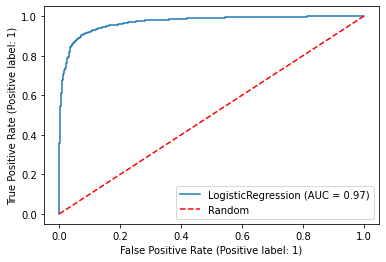

In [ ]:
# 앞서 소개한 분류 평가지표로 모델을 다시 평가해보자.
# 먼저 0과 1 클래스의 비율이 동일한 데이터셋으로 학습한 모델을 평가해보자.
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve, roc_auc_score

# roc_auc는 예측 클래스값이 아닌 예측 확률값을 기반으로 계산되므로 positive(1)로 예측할 확률값인 pred_proba 변수를 생성해준다.
pred = blind_log.predict(X_test_tfidf)
pred_proba = blind_log.predict_proba(X_test_tfidf)[:,1]
print('오차행렬:\n', confusion_matrix(Y_test, pred))
print('정확도:  ', accuracy_score(Y_test, pred))
print('정밀도:  ', precision_score(Y_test, pred))
print('재현율:  ', recall_score(Y_test, pred))
print('F1 스코어:   ', f1_score(Y_test, pred))
print('ROC_AUC: ', roc_auc_score(Y_test, pred_proba))
plot_roc_curve(blind_log, X_test_tfidf, Y_test)
plt.plot([0, 1], [0, 1], 'r--', label='Random') # 가운데 대각선 직선
plt.legend()
plt.show()

In [ ]:
#랜덤포레스트

from sklearn.ensemble import RandomForestClassifier

blind_rf = RandomForestClassifier(n_estimators = 100, max_depth=30, random_state = 0)   # 결정트리(나무100개) 100개 / 하나의 트리의 길이는(deep깊이) 30 
blind_rf.fit(X_train_tfidf, Y_train)
print('Train set score: {:.3f}'.format(blind_rf.score(X_train_tfidf, Y_train)))
print('Test set score: {:.3f}'.format(blind_rf.score(X_test_tfidf, Y_test)))

Train set score: 0.918
Test set score: 0.865


In [ ]:
#그래디언부스팅 
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train_tfidf, Y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train_tfidf, Y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test_tfidf, Y_test)))

brt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train_tfidf, Y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train_tfidf, Y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test_tfidf, Y_test)))

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.1)
gbrt.fit(X_train_tfidf, Y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train_tfidf, Y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test_tfidf, Y_test)))

훈련 세트 정확도: 0.853
테스트 세트 정확도: 0.837
훈련 세트 정확도: 0.853
테스트 세트 정확도: 0.837
훈련 세트 정확도: 0.853
테스트 세트 정확도: 0.837


In [ ]:
#모델핸들링 성능향상
import pickle
from google.colab import drive

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

In [ ]:
#분류모델 담을 리스트 생성
classifiers = []
#랜덤스테이트 2설정
random_state = 2
#데이터프레임 생성을 위하여 알고리즘 제목 저장
clf_names = ['Random Forest','Gradient Boost', 'Logistic Regression','Support Vector' ]
#트리기반 알고리즘
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
#선형 알고리즘
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(SVC(random_state=random_state))


In [ ]:
#레이블인코딩된 데이터로 교차검증을 수행하여 리스트에 저장
# 보통 kfold를 4개로 주거나 딱떨어지게 준다.
kfold = StratifiedKFold(n_splits=10) #n_splits = 10 10번의 교차 검증을 시행하겠다.

cv_results = []
for classifier in classifiers : #크로스 벨리션 스코어를 실행 #교차검증 10번시키고 학습 -> 검증
    cv_results.append(cross_val_score(classifier, X_train_tfidf, y = Y_train,
                                      scoring = "accuracy", cv = kfold, n_jobs=4)) #엔잡은 씨피유몇개


In [ ]:
 # 교차검증 점수 리스트 출력 #리스트를 보면 이 결과가 array가 1개의 개념 
# 각각 모델의 결과
# array가 10개의 cross_val_score
cv_results

[array([0.87882653, 0.86798469, 0.87372449, 0.88711735, 0.8807398 ,
        0.86543367, 0.8787492 , 0.88704531, 0.87364391, 0.87938736]),
 array([0.83035714, 0.8252551 , 0.82844388, 0.84757653, 0.84183673,
        0.83673469, 0.83599234, 0.85003191, 0.83535418, 0.84492661]),
 array([0.89604592, 0.89923469, 0.90561224, 0.91964286, 0.91709184,
        0.88520408, 0.90491385, 0.91831525, 0.9074665 , 0.90938098]),
 array([0.89413265, 0.90242347, 0.91262755, 0.9247449 , 0.91517857,
        0.89158163, 0.91065731, 0.92661136, 0.91384812, 0.91448628])]

In [ ]:
# 첫 번째 모델 랜덤포레스트의 평균 교차검증 점수 출력
cv_results[0].mean()

0.8772652312360808

In [ ]:
# 첫 번째 모델(Decision Tree Classifier)의 교차검증 점수 표준편차 출력
cv_results[0].std()

0.006824184728240763

In [ ]:
# 모델들의 교차검증 점수의 평균과 표준편차를 계산하여 리스트에 저장
cv_means = []
cv_std = []

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [ ]:
#데이터프레임으로 변환
results_le = pd.DataFrame(cv_results, index=clf_names)
results_le

0         1         2         3         4  \
Random Forest        0.878827  0.867985  0.873724  0.887117  0.880740   
Gradient Boost       0.830357  0.825255  0.828444  0.847577  0.841837   
Logistic Regression  0.896046  0.899235  0.905612  0.919643  0.917092   
Support Vector       0.894133  0.902423  0.912628  0.924745  0.915179   

                            5         6         7         8         9  
Random Forest        0.865434  0.878749  0.887045  0.873644  0.879387  
Gradient Boost       0.836735  0.835992  0.850032  0.835354  0.844927  
Logistic Regression  0.885204  0.904914  0.918315  0.907466  0.909381  
Support Vector       0.891582  0.910657  0.926611  0.913848  0.914486

In [ ]:
# 모델별 교차검증 점수 평균, 표준편차를 새로운 칼럼으로 추가
results_le['mean'] = cv_means
results_le['std'] = cv_std

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


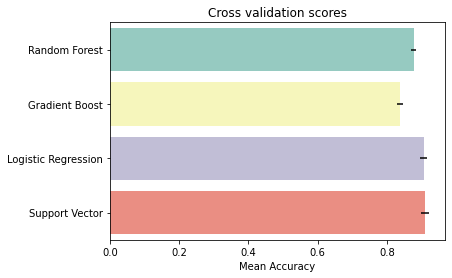

In [ ]:
#  모델별 교자검증 점수 평균 시각화
g = sns.barplot("mean",results_le.index ,data = results_le, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [ ]:
results_le.T

Random Forest  Gradient Boost  Logistic Regression  Support Vector
0          0.878827        0.830357             0.896046        0.894133
1          0.867985        0.825255             0.899235        0.902423
2          0.873724        0.828444             0.905612        0.912628
3          0.887117        0.847577             0.919643        0.924745
4          0.880740        0.841837             0.917092        0.915179
5          0.865434        0.836735             0.885204        0.891582
6          0.878749        0.835992             0.904914        0.910657
7          0.887045        0.850032             0.918315        0.926611
8          0.873644        0.835354             0.907466        0.913848
9          0.879387        0.844927             0.909381        0.914486
mean       0.877265        0.837651             0.906291        0.910629
std        0.006824        0.007891             0.010258        0.010986

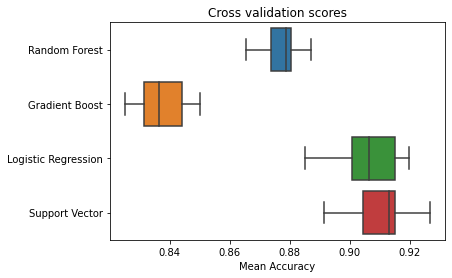

In [ ]:
# 모델별 교차검증 점수 시각화
results1 = results_le.drop(['mean', 'std'], axis=1)
g = sns.boxplot(data=results1.T, orient='h')
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [ ]:
#하이퍼 파라미터 - 1
# Random Forest 객체 생성
RFC = RandomForestClassifier(random_state=7)


# param_grid 설정
rf_param_grid = {"max_depth": [10,20,30],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300,500],
              "criterion": ["gini"]}

# Grid Search 객체 생성
#param_grid 
gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
gsRFC.fit(X_train_tfidf,Y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


KeyboardInterrupt: ignored

In [ ]:
# 최적의 파라미터 조합 출력
RFC_best = gsRFC.best_estimator_
print(RFC_best)

# 최고 점수(accuracy) 출력
print(gsRFC.best_score_)


In [ ]:
#Support Vector 객체 생성
#비활률적모형 서포트백터머신

SVM = SVC(random_state=7, probability=True)

# param_grid 설정
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.1, 1],
                  'C': [1, 10]}

# Gradient boost 객체 생성
gsSVM = GridSearchCV(SVM,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
gsSVM.fit(X_train_tfidf,Y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


In [ ]:
# 최적의 파라미터 조합 출력
SVM_best = gsSVM.best_estimator_
print(SVM_best)

# 최고 점수(accuracy) 출력
print(gsSVM.best_score_)


In [ ]:
from sklearn.linear_model import LogisticRegression

LGS = LogisticRegression(random_state=7)

# param_grid 설정
lgs_param_grid = {'penalty': ['l1','l2'], 'C': np.logspace(0,4,10,15,100)}

# Gradient boost 객체 생성
gsLGS = GridSearchCV(LGS,param_grid = lgs_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
gsLGS.fit(X_train_tfidf,Y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=7), n_jobs=4,
             param_grid={'C': array([1.00000000e+00, 7.74263683e+00, 5.99484250e+01, 4.64158883e+02,
       3.59381366e+03, 2.78255940e+04, 2.15443469e+05, 1.66810054e+06,
       1.29154967e+07, 1.00000000e+08]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [ ]:
# 최적의 파라미터 조합 출력
LGS_best = gsLGS.best_estimator_
print(LGS_best)

# 최고 점수(accuracy) 출력
print(gsLGS.best_score_)


LogisticRegression(C=2.7825594022071245, random_state=7)
0.9091618994438873


In [ ]:
#ExtraTrees 객체 생성
Ext = ExtraTreesClassifier(random_state=7)


# param_grid 설정
ex_param_grid = {"max_depth": [None],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

# Grad Search 객체 생성
gsExt = GridSearchCV(Ext,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
gsExt.fit(X_train_tfidf,Y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=ExtraTreesClassifier(random_state=7), n_jobs=4,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': [None], 'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 300]},
             scoring='accuracy', verbose=1)

In [ ]:
# 최적의 파라미터 조합 출력
Ext_best = gsExt.best_estimator_
print(Ext_best)

# 최고 점수(accuracy) 출력
print(gsExt.best_score_)


ExtraTreesClassifier(min_samples_split=10, random_state=7)
0.8918737708867848


In [ ]:
#장점만추림
topic= total[(total['label']==1)]
topic=topic['review']
topic

In [ ]:
단점만추림
cons= total[(total['label']==0)]
cons=cons['review']
cons

In [ ]:



!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [101 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:14 http://ppa.launc

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,255 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
# 한글, 영어, 숫자(소수와 퍼센트) 만 남기고 기타 특수문자들을 제거합니다. 
import re

def text_cleaning(doc):
  text = re.sub('[^가-힣ㄱ-ㅣa-zA-Z|0-9.%]', ' ', string = doc)
  return text

In [ ]:
# 원문
doc = ' '.join(topic)
doc

'재택근무 좋고 수당빵빵하다재택중에도 열심히 협업해주는 동료들이 든든하다사내 복지 좋고 자유도가 확보되어 좋음 재택근무라는 점과 자율성이 크고 개인 역량을 많이 봐준다는 느낌  - 네임밸류 - 주식보상 등 현금성 복지체계(많진않지만) - 유연한 근무제도 커리어향상 좋음같이일하는 동료들 똑똑함부바부이긴하지만 우리팀은 야근 많이하는건 지양하는편연봉 많이올려서 이직함경영진이 소통을 잘하는편인듯 그래도 수평적인 편.역량을 펼칠 기회도 인프라도 (본인이 잘하면) 있는 편. 남는시간에 뭘하든 신경쓰지 않는다.재택근무 가능 하다. 친절히 알려주는 고수가 많고 세미나가 많고 정보가 많은 회사 나름 자유로운 분위기 / 저년차 주니어에게는 성장하기 좋음 자유 분방했고 우리 팀원분들 분위기도 정말 좋았음 꼰대 문화는 진짜 없었던거 같고 수평적이고 완벽한 자율출퇴근제였음 커리어적인 측면과 업무과제들이 개인적인 성장에도 도움이됨 자율츌퇴근개발자 우선 문화(팀바팀)성장을 염두에 둔 좋은 동료들 좋은 부서에 배치 받으면 급여, 문화 등등 모두 만족하면서 다닐 수 있는 회사 임직원을 많이 생각해준다는 느낌을 받음전반적으로 만족하지만 내가 여기서 월등하게 성장할수잇을지는.잘.모르겟음 개인적인 대소사나 개인의 능력과 상황을 잘 고려해준다. 다양한 사람들을 존중해준다. 팀바팀, 부바부 좋은 사람들이 비교적 많다. 뛰어난 동료가 있어 같이 성장하기 좋다. - 뛰어난 팀원들- 실제로 많이 사용되는 서비스에 기여할 수 있다- 유연한 근무제도- 조식자판기 사무실 복지가 좋고 재택이 자유로운 점이 최고임 다들 열심히 일하는 분위기 실력있고 훌륭한 동료들과 같이 성장할 수 있는 기회가 많다 아침 점심 저녁 무료(아침은 자판기)괜찮은 연봉과 복지원격근무 가능, 업무기기 지원금 등 재택근무가 자유로우며 업무에대해서도 스스로 알아서 저유롭게 함 재택할 수 있어서 좋음.실력있는 개발자들과 같이 일할 수 있어서 좋다 당연히 팀바팀 부바부이지만 웬만해선 노는 사람은 없다고 느껴짐 재택근무책임근무제부모님실비소통방식일

In [ ]:
clean_doc = text_cleaning(doc)
clean_doc

'재택근무 좋고 수당빵빵하다재택중에도 열심히 협업해주는 동료들이 든든하다사내 복지 좋고 자유도가 확보되어 좋음 재택근무라는 점과 자율성이 크고 개인 역량을 많이 봐준다는 느낌    네임밸류   주식보상 등 현금성 복지체계 많진않지만    유연한 근무제도 커리어향상 좋음같이일하는 동료들 똑똑함부바부이긴하지만 우리팀은 야근 많이하는건 지양하는편연봉 많이올려서 이직함경영진이 소통을 잘하는편인듯 그래도 수평적인 편.역량을 펼칠 기회도 인프라도  본인이 잘하면  있는 편. 남는시간에 뭘하든 신경쓰지 않는다.재택근무 가능 하다. 친절히 알려주는 고수가 많고 세미나가 많고 정보가 많은 회사 나름 자유로운 분위기   저년차 주니어에게는 성장하기 좋음 자유 분방했고 우리 팀원분들 분위기도 정말 좋았음 꼰대 문화는 진짜 없었던거 같고 수평적이고 완벽한 자율출퇴근제였음 커리어적인 측면과 업무과제들이 개인적인 성장에도 도움이됨 자율츌퇴근개발자 우선 문화 팀바팀 성장을 염두에 둔 좋은 동료들 좋은 부서에 배치 받으면 급여  문화 등등 모두 만족하면서 다닐 수 있는 회사 임직원을 많이 생각해준다는 느낌을 받음전반적으로 만족하지만 내가 여기서 월등하게 성장할수잇을지는.잘.모르겟음 개인적인 대소사나 개인의 능력과 상황을 잘 고려해준다. 다양한 사람들을 존중해준다. 팀바팀  부바부 좋은 사람들이 비교적 많다. 뛰어난 동료가 있어 같이 성장하기 좋다.   뛰어난 팀원들  실제로 많이 사용되는 서비스에 기여할 수 있다  유연한 근무제도  조식자판기 사무실 복지가 좋고 재택이 자유로운 점이 최고임 다들 열심히 일하는 분위기 실력있고 훌륭한 동료들과 같이 성장할 수 있는 기회가 많다 아침 점심 저녁 무료 아침은 자판기 괜찮은 연봉과 복지원격근무 가능  업무기기 지원금 등 재택근무가 자유로우며 업무에대해서도 스스로 알아서 저유롭게 함 재택할 수 있어서 좋음.실력있는 개발자들과 같이 일할 수 있어서 좋다 당연히 팀바팀 부바부이지만 웬만해선 노는 사람은 없다고 느껴짐 재택근무책임근무제부모님실비소통방식일

In [ ]:
# Mecab 토큰화 
from konlpy.tag import Mecab

tokenizer = Mecab()
tokenizer.morphs(clean_doc.split('.')[0]) # 첫 문장 토큰화

['재택근무',
 '좋',
 '고',
 '수당',
 '빵빵',
 '하',
 '다',
 '재택',
 '중',
 '에',
 '도',
 '열심히',
 '협업',
 '해',
 '주',
 '는',
 '동료',
 '들',
 '이',
 '든든',
 '하',
 '다',
 '사내',
 '복지',
 '좋',
 '고',
 '자유도',
 '가',
 '확보',
 '되',
 '어',
 '좋',
 '음',
 '재택근무',
 '라는',
 '점',
 '과',
 '자율',
 '성',
 '이',
 '크',
 '고',
 '개인',
 '역량',
 '을',
 '많이',
 '봐준다',
 '는',
 '느낌',
 '네임',
 '밸류',
 '주식',
 '보상',
 '등',
 '현금',
 '성',
 '복지',
 '체계',
 '많',
 '진',
 '않',
 '지만',
 '유연',
 '한',
 '근무',
 '제도',
 '커리어',
 '향상',
 '좋',
 '음',
 '같이',
 '일',
 '하',
 '는',
 '동료',
 '들',
 '똑똑',
 '함',
 '부바',
 '부이',
 '긴',
 '하',
 '지만',
 '우리',
 '팀',
 '은',
 '야근',
 '많이',
 '하',
 '는',
 '건',
 '지양',
 '하',
 '는',
 '편',
 '연봉',
 '많이',
 '올려서',
 '이',
 '직함',
 '경영진',
 '이',
 '소통',
 '을',
 '잘',
 '하',
 '는',
 '편',
 '인',
 '듯',
 '그래도',
 '수평',
 '적',
 '인',
 '편']

In [ ]:
nouns = [s for s, t in token_tagged if t in ['SL', 'NNG', 'NNP'] and len(s) > 1]
nouns

['재택근무',
 '수당',
 '재택',
 '협업',
 '동료',
 '사내',
 '복지',
 '자유도',
 '확보',
 '재택근무',
 '자율',
 '개인',
 '역량',
 '네임',
 '밸류',
 '주식',
 '보상',
 '현금',
 '복지',
 '체계',
 '근무',
 '제도',
 '커리어',
 '향상',
 '동료',
 '부바',
 '야근',
 '지양',
 '연봉',
 '직함',
 '경영진',
 '소통',
 '수평',
 '역량',
 '기회',
 '인프라',
 '본인',
 '시간',
 '신경',
 '재택근무',
 '가능',
 '고수',
 '세미나',
 '정보',
 '회사',
 '자유',
 '분위기',
 '년차',
 '주니어',
 '성장',
 '자유',
 '분방',
 '팀원',
 '분위기',
 '꼰대',
 '문화',
 '수평',
 '완벽',
 '자율',
 '출퇴근',
 '커리어',
 '측면',
 '업무',
 '과제',
 '개인',
 '성장',
 '도움',
 '자율',
 '문화',
 '성장',
 '염두',
 '동료',
 '부서',
 '배치',
 '급여',
 '문화',
 '만족',
 '회사',
 '임직원',
 '생각',
 '느낌',
 '전반',
 '만족',
 '성장',
 '개인',
 '대소사',
 '개인',
 '능력',
 '상황',
 '고려',
 '사람',
 '존중',
 '부바',
 '사람',
 '비교',
 '동료',
 '성장',
 '팀원',
 '사용',
 '서비스',
 '기여',
 '근무',
 '제도',
 '조식',
 '자판기',
 '사무실',
 '복지',
 '재택',
 '자유',
 '최고',
 '분위기',
 '실력',
 '동료',
 '성장',
 '기회',
 '아침',
 '점심',
 '저녁',
 '무료',
 '아침',
 '자판기',
 '연봉',
 '복지',
 '원격',
 '근무',
 '가능',
 '업무',
 '기기',
 '지원금',
 '재택근무',
 '자유',
 '업무',
 '저유',
 '재택',
 '실력',
 '개발자',
 '부바',
 '사람',
 '재택근무'

In [ ]:
' '.join(nouns)

'재택근무 수당 재택 협업 동료 사내 복지 자유도 확보 재택근무 자율 개인 역량 네임 밸류 주식 보상 현금 복지 체계 근무 제도 커리어 향상 동료 부바 야근 지양 연봉 직함 경영진 소통 수평 역량 기회 인프라 본인 시간 신경 재택근무 가능 고수 세미나 정보 회사 자유 분위기 년차 주니어 성장 자유 분방 팀원 분위기 꼰대 문화 수평 완벽 자율 출퇴근 커리어 측면 업무 과제 개인 성장 도움 자율 문화 성장 염두 동료 부서 배치 급여 문화 만족 회사 임직원 생각 느낌 전반 만족 성장 개인 대소사 개인 능력 상황 고려 사람 존중 부바 사람 비교 동료 성장 팀원 사용 서비스 기여 근무 제도 조식 자판기 사무실 복지 재택 자유 최고 분위기 실력 동료 성장 기회 아침 점심 저녁 무료 아침 자판기 연봉 복지 원격 근무 가능 업무 기기 지원금 재택근무 자유 업무 저유 재택 실력 개발자 부바 사람 재택근무 책임 근무 부모 실비 소통 방식 동료 사내 분위기 연봉 퇴근 자유 워라 동료 성장 변화 에너지 존재 자율 출퇴근 식비 지원 회사 인지 부모 실비 보험 지원 규모 트래픽 사내 인프라 적정 수준 복지 실력 동료 사람 업무 순환 사람 합리 의사 결정 자율 재택 가능 개인 업무 지원 통신비 플릭스 건물 조음 체험 인턴 불만 선배 와중 인턴 감사 기억 선배 커리어 성장 기회 급여 복지 경영진 투명 공유 노력 재택근무 사내 플랫 동료 다양 업무 기기 지원 자유 근무 환경 사내 시스템 최대한 실용 복지 제공 노력 도움 정신 와중 매너 배려 팀원 능력 동시 친절 동료 기업 인프라 복지 시설 기본 복지 건물 병원 재택 가능 몰입 고민 부분 세끼 작업 환경 신경 재택근무 원활 동료 책임 사람 업계 상위 연봉 국내 서비스 개발 네이버 네임 벨류 시스템 공짜 다대 기업 느낌 업계 최고 자부심 복지 사옥 옥내 보상 사람 전반 복지 보람 대한민국 it 근간 회사 대한민국 이벤트 회사 재택근무 가능 리트 업무 복지 워라 재택 선택 가능 재택근무 자유 업무 시간 복지 출근 점시 저녁 무료 근무 사람 실력

In [ ]:
# 토큰화 이후 단어 길이가 2 이상인 명사만 남기기 
# 일반명사(NNG), 고유명사(NNP), 외국어(SL)만을 반환
# 한국어의 경우 토큰화 과정에서 조사나 접속사 제거로 대부분의 불용어가제거 되지만 불필요한 명사나 형용사를 제거하고 싶은 경우 불용어 제거를 추가하면 됩니다. 

from konlpy.tag import Mecab

def text_preprocess(doc):
  tokenizer = Mecab()
  
  # 텍스트 전처리
  clean_doc =  text_cleaning(doc)
  
  # 품사 붙이기
  token_tagged = tokenizer.pos(clean_doc)

  # 명사추출
  nouns = [s for s, t in token_tagged if t in ['SL', 'NNG', 'NNP'] and len(s) > 1]

  # 한 문장으로 합치기 
  # 아래에서 활용할 TfidfVectorizer는 기본적으로 토큰화가 되어있지 않은 텍스트 데이터를 입력으로 사용하기 때문에 join 작업을 미리 해줍니다. 
  preprocessed = ' '.join(nouns)

  return preprocessed

print('전처리 결과 확인 :')
topic=text_preprocess(doc)
topic

print(topic)

전처리 결과 확인 :
재택근무 수당 재택 협업 동료 사내 복지 자유도 확보 재택근무 자율 개인 역량 네임 밸류 주식 보상 현금 복지 체계 근무 제도 커리어 향상 동료 부바 야근 지양 연봉 직함 경영진 소통 수평 역량 기회 인프라 본인 시간 신경 재택근무 가능 고수 세미나 정보 회사 자유 분위기 년차 주니어 성장 자유 분방 팀원 분위기 꼰대 문화 수평 완벽 자율 출퇴근 커리어 측면 업무 과제 개인 성장 도움 자율 문화 성장 염두 동료 부서 배치 급여 문화 만족 회사 임직원 생각 느낌 전반 만족 성장 개인 대소사 개인 능력 상황 고려 사람 존중 부바 사람 비교 동료 성장 팀원 사용 서비스 기여 근무 제도 조식 자판기 사무실 복지 재택 자유 최고 분위기 실력 동료 성장 기회 아침 점심 저녁 무료 아침 자판기 연봉 복지 원격 근무 가능 업무 기기 지원금 재택근무 자유 업무 저유 재택 실력 개발자 부바 사람 재택근무 책임 근무 부모 실비 소통 방식 동료 사내 분위기 연봉 퇴근 자유 워라 동료 성장 변화 에너지 존재 자율 출퇴근 식비 지원 회사 인지 부모 실비 보험 지원 규모 트래픽 사내 인프라 적정 수준 복지 실력 동료 사람 업무 순환 사람 합리 의사 결정 자율 재택 가능 개인 업무 지원 통신비 플릭스 건물 조음 체험 인턴 불만 선배 와중 인턴 감사 기억 선배 커리어 성장 기회 급여 복지 경영진 투명 공유 노력 재택근무 사내 플랫 동료 다양 업무 기기 지원 자유 근무 환경 사내 시스템 최대한 실용 복지 제공 노력 도움 정신 와중 매너 배려 팀원 능력 동시 친절 동료 기업 인프라 복지 시설 기본 복지 건물 병원 재택 가능 몰입 고민 부분 세끼 작업 환경 신경 재택근무 원활 동료 책임 사람 업계 상위 연봉 국내 서비스 개발 네이버 네임 벨류 시스템 공짜 다대 기업 느낌 업계 최고 자부심 복지 사옥 옥내 보상 사람 전반 복지 보람 대한민국 it 근간 회사 대한민국 이벤트 회사 재택근무 가능 리트 업무 복지 워라 재택 선택 가능 재택근무 자유 업무 시간 복지 출근 점시 저녁 

In [ ]:
topic


'재택근무 수당 재택 협업 동료 사내 복지 자유도 확보 재택근무 자율 개인 역량 네임 밸류 주식 보상 현금 복지 체계 근무 제도 커리어 향상 동료 부바 야근 지양 연봉 직함 경영진 소통 수평 역량 기회 인프라 본인 시간 신경 재택근무 가능 고수 세미나 정보 회사 자유 분위기 년차 주니어 성장 자유 분방 팀원 분위기 꼰대 문화 수평 완벽 자율 출퇴근 커리어 측면 업무 과제 개인 성장 도움 자율 문화 성장 염두 동료 부서 배치 급여 문화 만족 회사 임직원 생각 느낌 전반 만족 성장 개인 대소사 개인 능력 상황 고려 사람 존중 부바 사람 비교 동료 성장 팀원 사용 서비스 기여 근무 제도 조식 자판기 사무실 복지 재택 자유 최고 분위기 실력 동료 성장 기회 아침 점심 저녁 무료 아침 자판기 연봉 복지 원격 근무 가능 업무 기기 지원금 재택근무 자유 업무 저유 재택 실력 개발자 부바 사람 재택근무 책임 근무 부모 실비 소통 방식 동료 사내 분위기 연봉 퇴근 자유 워라 동료 성장 변화 에너지 존재 자율 출퇴근 식비 지원 회사 인지 부모 실비 보험 지원 규모 트래픽 사내 인프라 적정 수준 복지 실력 동료 사람 업무 순환 사람 합리 의사 결정 자율 재택 가능 개인 업무 지원 통신비 플릭스 건물 조음 체험 인턴 불만 선배 와중 인턴 감사 기억 선배 커리어 성장 기회 급여 복지 경영진 투명 공유 노력 재택근무 사내 플랫 동료 다양 업무 기기 지원 자유 근무 환경 사내 시스템 최대한 실용 복지 제공 노력 도움 정신 와중 매너 배려 팀원 능력 동시 친절 동료 기업 인프라 복지 시설 기본 복지 건물 병원 재택 가능 몰입 고민 부분 세끼 작업 환경 신경 재택근무 원활 동료 책임 사람 업계 상위 연봉 국내 서비스 개발 네이버 네임 벨류 시스템 공짜 다대 기업 느낌 업계 최고 자부심 복지 사옥 옥내 보상 사람 전반 복지 보람 대한민국 it 근간 회사 대한민국 이벤트 회사 재택근무 가능 리트 업무 복지 워라 재택 선택 가능 재택근무 자유 업무 시간 복지 출근 점시 저녁 무료 근무 사람 실력

In [ ]:
# tqdm.pandas를 활용하면 pandas내 apply 작업의 진행상황을 확인할 수 있습니다. 
from tqdm import tqdm
tqdm.pandas() 

total['review2']= total['review'].progress_apply(lambda x: text_preprocess(' '.join(x)))
total

In [ ]:
# 한 문장으로 join 해놓은 전처리 완료된 문장들을 공백 기준으로 분리하는 함수입니다. 

def my_tokenizer(text):
  return text.split()

In [ ]:
def bigram_tokenizer(text):
    tokens = text.split()
    return [' '.join(tokens[i:i+2]) for i in range(len(tokens)-1)]

In [ ]:
total=bigram_tokenizer(topic)



In [ ]:
# sklearn을 통해서 TF-IDF 행렬을 만들어 줍니다. 
from sklearn.feature_extraction.text import TfidfVectorizer
# sklearn을 통해서 TF-IDF 행렬을 만들어 줍니다. 
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=bigram_tokenizer)
tfidf = tfidf_vect.fit_transform(total)

tfidf

<68324x34488 sparse matrix of type '<class 'numpy.float64'>'
	with 68324 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation?

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = 5, 
                                max_iter = 20,
                                learning_method='online',
                                random_state=100)
lda_output = lda.fit_transform(tfidf)

In [ ]:
sample = list(range(10))
print(sample[:])
# print(sample[:-4:-1])

n = 1
print(sample[:-n-1:-1])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[9]


In [ ]:
terms = tfidf_vect.get_feature_names() # 단어 집합

def get_topics(components, feature_names, n=7):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lda.components_,terms)

Topic 1: [('네임 밸류', 212.52), ('의사 결정', 152.35), ('자율 출퇴근', 142.51), ('네임 벨류', 105.29), ('급여 복지', 93.77), ('개발 문화', 92.6), ('경험 가능', 87.97)]
Topic 2: [('수평 문화', 319.1), ('워라 보장', 165.63), ('근무 시간', 157.48), ('커리어 향상', 84.81), ('성장 기회', 77.99), ('능력 동료', 75.26), ('동료 성장', 65.85)]
Topic 3: [('사내 문화', 236.4), ('근무 환경', 171.09), ('연차 사용', 151.27), ('성장 가능', 134.58), ('기업 문화', 125.31), ('재택 근무', 113.54), ('수평 분위기', 112.67)]
Topic 4: [('자유 연차', 118.98), ('야근 수당', 107.22), ('수평 조직', 99.4), ('재택근무 가능', 88.85), ('회사 복지', 87.56), ('실력 동료', 74.35), ('업무 경험', 72.33)]
Topic 5: [('자유 분위기', 263.4), ('조직 문화', 219.9), ('성장 회사', 153.85), ('연봉 복지', 82.28), ('복지 회사', 74.89), ('자율 근무', 74.77), ('재택 가능', 69.83)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# LDAvis 는 토픽 모델링에 자주 이용되는 Latent Dirichlet Allocation (LDA) 모델의 학습 결과를 시각적으로 표현하는 라이브러리입니다
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# LDA 시각화를 진행해봅시다. 
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda, tfidf, tfidf_vect, mds='tsne')
pyLDAvis.display(vis)


/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by defau